In [21]:
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import numpy as np
import random

In [22]:
X_train =np.loadtxt('Desktop/ml/input.csv',delimiter = ',')
y_train=np.loadtxt('Desktop/ml/labels.csv',delimiter = ',')

X_test =np.loadtxt('Desktop/ml/input_test.csv',delimiter = ',')
y_test=np.loadtxt('Desktop/ml/labels_test.csv',delimiter = ',')

In [23]:
X_train =X_train.reshape(len(X_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
X_test =X_test.reshape(len(X_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

X_train=X_train/255.0
X_test=X_test/255.0

In [24]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


In [25]:
X_train[1:,]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

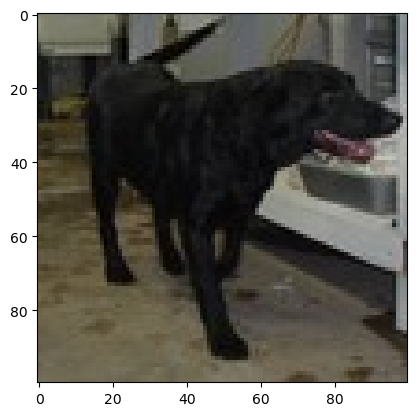

In [28]:
indx=random.randint(0,len(X_train))
plt.imshow(X_train[indx,:])
plt.show()

In [39]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))


In [43]:
model.compile(loss='binary_crossentropy' ,optimizer= 'adam' ,metrics= ['accuracy'])

In [45]:
model.fit(X_train,y_train,epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - accuracy: 0.8429 - loss: 0.3591
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 0.8651 - loss: 0.3092
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - accuracy: 0.9063 - loss: 0.2403
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.9412 - loss: 0.1824
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.9576 - loss: 0.1415


In [46]:
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7479 - loss: 0.7156


[0.9058142900466919, 0.6800000071525574]

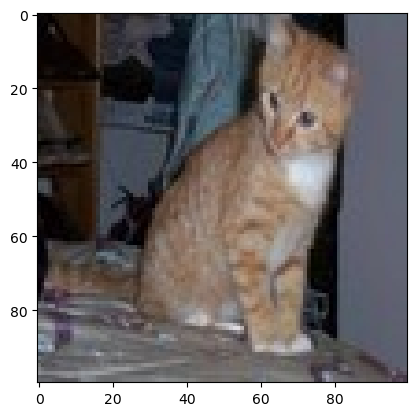

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Our model says it is a : cat


In [100]:
idx2 = random.randint(0, len(y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)